# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(citipy)

<module 'citipy.citipy' from '/Users/neelashivakumar/Documents/GitHub/Python-APIs-Homework/citipy/citipy.py'>


## Generate Cities List

In [22]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)

12/23/18


In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [25]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | suchiapa
Processing Record 8 of Set 1 | atar
Processing Record 9 of Set 1 | adolfo lopez mateos
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | puerto escondido
Processing Record 12 of Set 1 | kapaa
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | muzaffarabad
Processing Record 18 of Set 1 | mataura
City not found. Skipping...
Processing Record 19 of Set 1 | bud
Processing Record 20 of Set 1 | henties bay
Processing Record 21 of Set 1 | alice springs
City not found.

Processing Record 179 of Set 1 | muisne
Processing Record 180 of Set 1 | bredasdorp
Processing Record 181 of Set 1 | grimshaw
Processing Record 182 of Set 1 | noyabrsk
Processing Record 183 of Set 1 | ishigaki
Processing Record 184 of Set 1 | barguzin
Processing Record 185 of Set 1 | hualmay
Processing Record 186 of Set 1 | tondano
Processing Record 187 of Set 1 | onega
Processing Record 188 of Set 1 | moron
Processing Record 189 of Set 1 | kruisfontein
Processing Record 190 of Set 1 | bonavista
Processing Record 191 of Set 1 | katsuura
City not found. Skipping...
Processing Record 192 of Set 1 | yerbogachen
Processing Record 193 of Set 1 | benjamin constant
Processing Record 194 of Set 1 | kayerkan
City not found. Skipping...
Processing Record 195 of Set 1 | puerto maldonado
Processing Record 196 of Set 1 | lokachi
Processing Record 197 of Set 1 | nikolskoye
Processing Record 198 of Set 1 | trincomalee
City not found. Skipping...
Processing Record 199 of Set 1 | alyangula
Processing R

Processing Record 360 of Set 1 | hamilton
Processing Record 361 of Set 1 | zhanakorgan
Processing Record 362 of Set 1 | mandan
City not found. Skipping...
Processing Record 363 of Set 1 | carahue
Processing Record 364 of Set 1 | alofi
City not found. Skipping...
Processing Record 365 of Set 1 | festus
Processing Record 366 of Set 1 | dong hoi
City not found. Skipping...
Processing Record 367 of Set 1 | soure
Processing Record 368 of Set 1 | kemin
Processing Record 369 of Set 1 | hingoli
Processing Record 370 of Set 1 | cubara
Processing Record 371 of Set 1 | pringsewu
Processing Record 372 of Set 1 | ukiah
Processing Record 373 of Set 1 | kirakira
Processing Record 374 of Set 1 | port augusta
Processing Record 375 of Set 1 | sangamner
Processing Record 376 of Set 1 | sisimiut
Processing Record 377 of Set 1 | brae
Processing Record 378 of Set 1 | sechura
Processing Record 379 of Set 1 | cam ranh
Processing Record 380 of Set 1 | abdulino
Processing Record 381 of Set 1 | new port richey
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          507
Cloudiness    507
Country    507
Date    507
Humidity    507
Lat    507
Lng    507
Max Temp    507
Wind Speed    507


In [27]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,0,AR,1545582232,34,-38.31,-60.23,32.87,7.73
1,Kodiak,1,US,1545580500,81,39.95,-94.76,1.20,1.50
2,Bluff,0,AU,1545582213,76,-23.58,149.07,20.47,6.21
3,Upernavik,64,GL,1545582227,100,72.79,-56.15,-17.56,7.21
4,Port Lincoln,0,AU,1545582245,95,-34.72,135.86,16.07,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

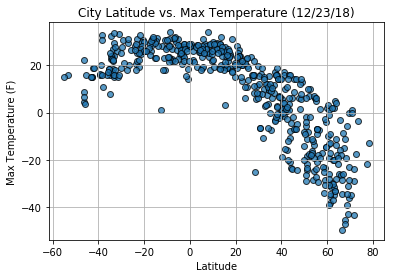

In [28]:
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
#plt.savefig('max_temperature')

#### Latitude vs. Humidity Plot

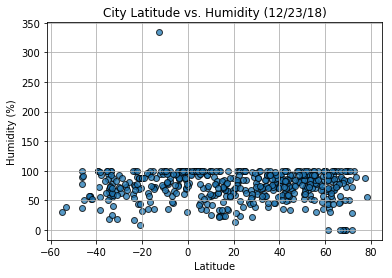

In [29]:
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.scatter(Lat, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Cloudiness Plot

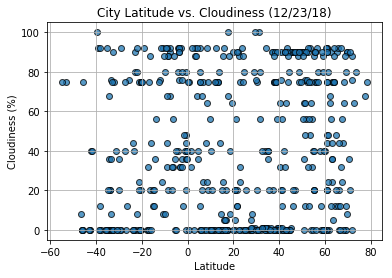

In [30]:
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Wind Speed Plot

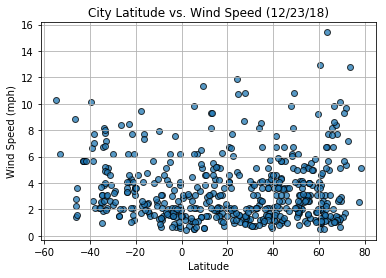

In [31]:
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(Lat, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()
